In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
df=pd.read_csv(r'C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\dataset\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No
766,1,126,60,0,0,30.1,0.349,47,Yes


In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [45]:
df.loc[:,'Glucose':'BMI']=df.loc[:,'Glucose':'BMI'].replace(0,np.nan)
df # replace 0 values into 'nan' , variable assign for 'nan' permanent

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,Yes
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,No
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,No
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,No
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,No
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,No
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,Yes


In [46]:
df.shape

(768, 9)

In [47]:
si=SimpleImputer(strategy='median') # use simpleimputer for values replace at same time in all columns
si.fit_transform(df.loc[:,'Glucose':'BMI']) # fit_tranform use for replace values  at one time in we want that columns

array([[148. ,  72. ,  35. , 125. ,  33.6],
       [ 85. ,  66. ,  29. , 125. ,  26.6],
       [183. ,  64. ,  29. , 125. ,  23.3],
       ...,
       [121. ,  72. ,  23. , 112. ,  26.2],
       [126. ,  60. ,  29. , 125. ,  30.1],
       [ 93. ,  70. ,  31. , 125. ,  30.4]])

In [48]:
df.loc[:,'Glucose':'BMI']=si.fit_transform(df.loc[:,'Glucose':'BMI'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,Yes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,No
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,Yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,No
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,No
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,No
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,No
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,Yes


In [49]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.boxplot()

<Axes: >

# data transformation
- encoding,scalling

In [52]:
le=LabelEncoder() # lable encoding target column
df['Outcome']=le.fit_transform(df['Outcome'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [53]:
df.iloc[:,:-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [54]:
# define  x and y

x=df.iloc[:,:-1]
y=df['Outcome']

In [55]:
sc=StandardScaler()

In [56]:
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


# model training
- train_test_split

In [84]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=1)

In [85]:
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,1.530847,0.767420,0.629782,1.922706,-0.123622,0.792465,0.498693,0.575118
712,1.827813,0.241424,-0.859204,0.784467,-0.181541,1.272766,-0.093250,0.404942
161,0.936914,-0.646195,0.133453,1.239762,-0.413219,0.690584,-0.809018,1.000557
509,1.233880,-0.054449,0.464339,-0.012301,-0.181541,-1.085073,-0.189894,2.617224
305,-0.547919,-0.054449,0.298896,0.898290,-0.413219,1.054447,-0.775797,-0.360847
...,...,...,...,...,...,...,...,...
645,-0.547919,1.161918,0.133453,0.670643,3.467383,1.010784,-1.020427,-0.275760
715,0.936914,2.148161,-1.851862,0.442995,2.911357,0.210283,1.069496,0.064591
72,2.718712,0.142800,1.456996,-0.012301,-0.181541,1.592966,0.335607,0.745293
235,0.046014,1.622164,-0.031990,-0.012301,-0.181541,1.622075,0.021514,-0.616111


In [86]:
ytrain

663    1
712    1
161    0
509    0
305    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 614, dtype: int64

In [87]:
lr=LogisticRegression()

In [88]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [89]:
lr.coef_

array([[ 0.40242066,  1.08738768, -0.137897  ,  0.00784659, -0.07363624,
         0.65173475,  0.22126107,  0.16132143]])

In [90]:
lr.intercept_

array([-0.84609728])

In [94]:
xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,0.936914,0.471547,0.133453,-0.353773,-0.065702,-0.939527,0.528894,1.511083
101,-0.844885,0.964669,-1.024647,-0.012301,-0.181541,-0.924973,-0.884521,-0.956462
581,0.639947,-0.416071,-1.024647,-0.239949,-0.181541,-1.085073,-0.802978,-0.531023
352,-0.250952,-1.994060,0.795225,-0.126125,-0.181541,0.283056,-0.691234,1.085644
726,-0.844885,-0.185948,0.464339,-0.012301,0.455573,0.530483,0.072856,-0.701198
...,...,...,...,...,...,...,...,...
563,0.639947,-0.744819,-1.024647,-1.150541,-1.003997,-0.808536,0.075877,-0.105584
318,-0.250952,-0.218823,-0.528319,1.125938,-0.007783,0.821575,-0.972105,-0.445935
154,1.233880,2.181036,0.464339,-0.012301,-0.181541,2.247921,-1.011366,0.830381
684,0.342981,0.471547,0.795225,-0.012301,-0.181541,-0.022590,0.507754,3.042663


In [95]:
ytest

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64

In [96]:
y_pred=lr.predict(xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [97]:
len(ypred)

231

In [98]:
ytest

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64

# evaluatuing the logisticRegression

In [99]:
# FP high harmful,precision increases

In [100]:
# FN is more harmful,we focus on recall value

In [2]:
from sklearn.metrics import confusion_matrix,classcification_report

ImportError: cannot import name 'classcification_report' from 'sklearn.metrics' (C:\Users\Sarvadnya\.jupyter\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
confusion_matrix(ytest,ypred)

In [106]:
print(classification_report(ytest,y_pred))
# acuraccy  of 0 (negative patient) is more in comparison to 1 (positive) because the data is imbalance
# we have more data  for negative patients than positive patients
# ml model can learn more  from more data and less from less data

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



In [107]:
len(xtrain)

614

In [108]:
len(xtest)

154

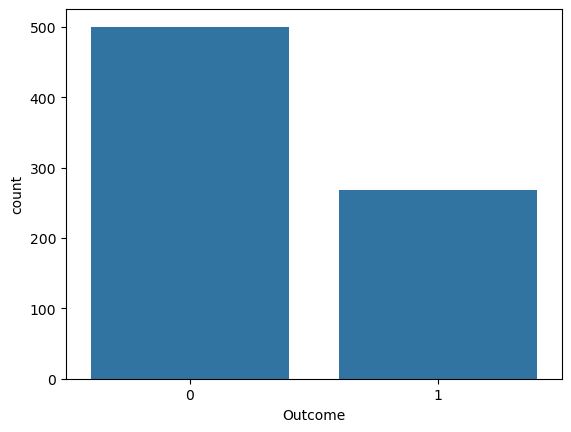

In [103]:
sns.countplot(x=df['Outcome'])
plt.show()